In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'/kaggle/input/amazon-prime-movies-and-tv-shows/amazon_prime_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."
9667,s9668,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",NaN,NaN,2010,R,103 min,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
df.isnull().sum()/len(df) * 100

show_id          0.000000
type             0.000000
title            0.000000
director        21.545304
cast            12.753413
country         93.049235
date_added      98.396773
release_year     0.000000
rating           3.485726
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop('description' , axis = 1 , inplace = True)

In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama"
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense"
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy"


In [11]:
df['director'].fillna('unavailable',inplace = True)
df['cast'].fillna('unavailable',inplace = True)
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].ffill()
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [12]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [13]:
df['date_added'] = pd.to_datetime(df['date_added'] , format='%B %d, %Y')

In [14]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,13+,113 min,"Comedy, Drama"
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International"
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,13+,74 min,"Action, Drama, Suspense"
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,13+,69 min,Documentary
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,13+,45 min,"Drama, Fantasy"


In [15]:
df['rating'].unique()

array(['13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+', 'TV-PG',
       '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G', 'PG',
       'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

In [16]:
df['rating'] = df['rating'].replace({'AGES_16_':'16+' , 'AGES_18_':'18+' , 'NOT_RATE':'UNRATE' , '16':'16+'})

In [17]:
df['type'].value_counts()

type
Movie      7814
TV Show    1854
Name: count, dtype: int64

In [18]:
df.rename(columns={'listed_in':'categories'} , inplace = True)

In [19]:
df['duration_min'] = df['duration'].apply(lambda x : int(x.split()[0]) if 'min' in x else 0)

In [20]:
df['duration_seasons'] = df['duration'].apply(lambda x : int(x.split()[0]) if 'Seasons' in x else 0)

In [21]:
df.describe()

,date_added,release_year,duration_min,duration_seasons
count,9668,9668.000000,9668.000000,9668.000000
mean,2021-06-04 18:47:48.680182016,2008.341849,73.801303,0.191663
min,2021-03-30 00:00:00,1920.000000,0.000000,0.000000
25%,2021-03-30 00:00:00,2007.000000,41.000000,0.000000
50%,2021-05-22 00:00:00,2016.000000,86.000000,0.000000
75%,2021-08-06 00:00:00,2019.000000,101.000000,0.000000
max,2021-10-10 00:00:00,2021.000000,601.000000,29.000000
std,NaN,18.922482,51.060792,1.014932


In [22]:
df.describe(include='object')

,show_id,type,title,director,cast,country,rating,duration,categories
count,9668,9668,9668,9668,9668,9668,9668,9668,9668
unique,9668,2,9668,5774,7928,86,21,219,518
top,s1,Movie,The Grand Seduction,unavailable,unavailable,United States,13+,1 Season,Drama
freq,1,7814,1,2083,1233,9249,2454,1342,986


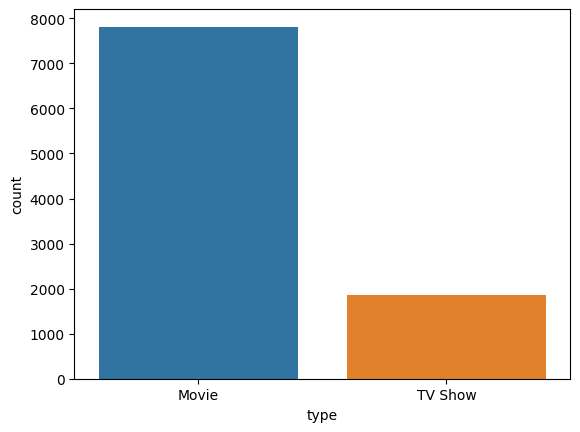

In [23]:
sns.countplot(data = df , x = 'type')
plt.show()

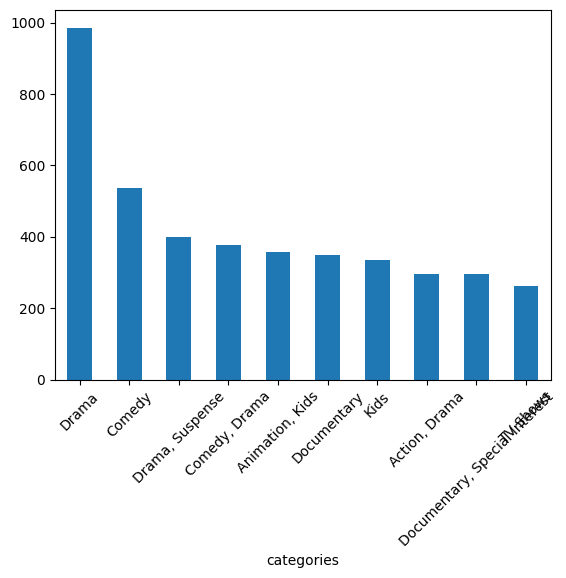

In [24]:
df['categories'].value_counts()[:10].plot.bar()
plt.xticks(rotation=45)
plt.show()

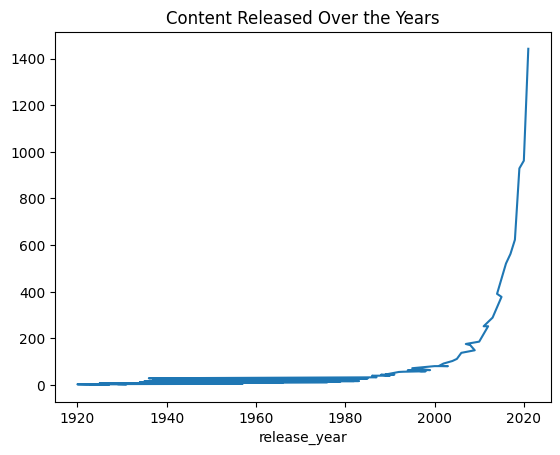

In [25]:
df['release_year'].value_counts().plot.line()
plt.title("Content Released Over the Years")
plt.show()

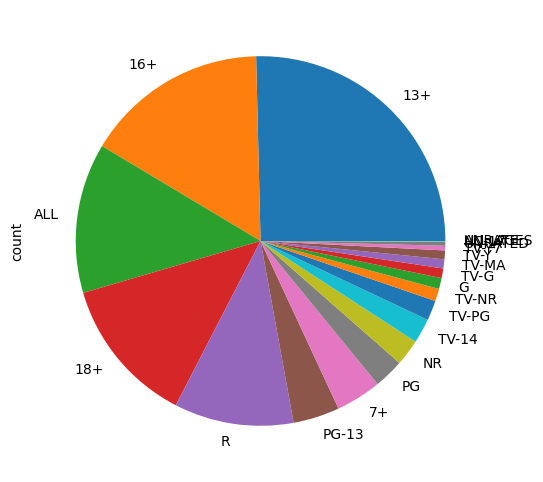

In [26]:
plt.figure(figsize = (8,6))
df['rating'].value_counts().plot.pie()
plt.show()